In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt

2023-09-17 22:18:54.186000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = data.load_data() #Loading the dataset

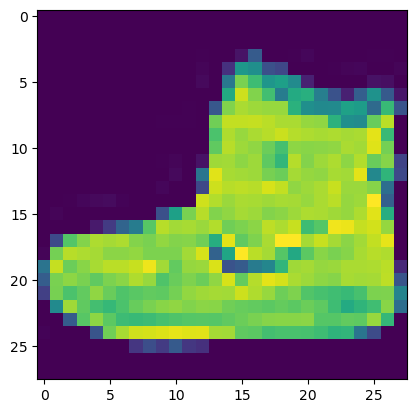

In [3]:
plt.imshow(X_train_full[0]) #showing the first image

In [4]:
y_train_full[0]

9

### Data normalization
#### We then normalize the data dimensions so that they are approximately the same scale

In [5]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [6]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [7]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #flattening 2D 28 x 28 to 1D 
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2023-09-17 22:18:58.195353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pydot
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Training the model

In [12]:
model.compile(loss="sparse_categorical_crossentropy", # as we are getting labels eith probabilities
             optimizer="sgd", # Stochastic gradient descent, basically telling to do back propagation
             metrics=["accuracy"]) # as it is a classifier

In [14]:
model_history = model.fit(X_train,y_train,epochs=30,
                         validation_data=(X_valid,y_valid)) #fitting the data into the model

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7220 - accuracy: 0.7647 - val_loss: 0.5247 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4908 - accuracy: 0.8273 - val_loss: 0.4410 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4464 - accuracy: 0.8421 - val_loss: 0.5479 - val_accuracy: 0.7966
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4201 - accuracy: 0.8521 - val_loss: 0.4002 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4022 - accuracy: 0.8585 - val_loss: 0.3844 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3832 - accuracy: 0.8643 - val_loss: 0.3785 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3704 - accuracy: 0.8685 - val_loss: 0.3680 - val_accuracy:

In [15]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

### Testing the model

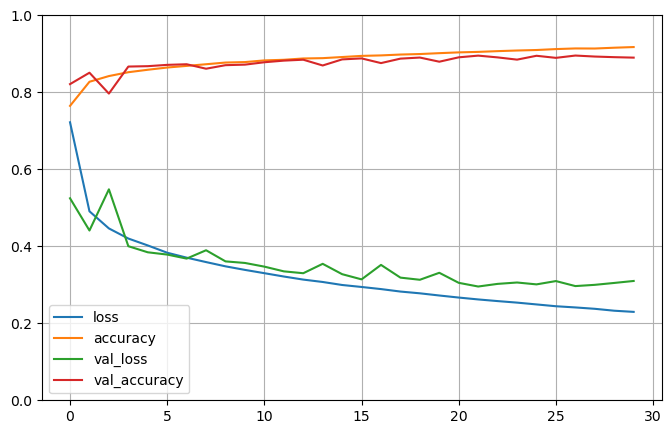

In [17]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 784us/step - loss: 0.3493 - accuracy: 0.8782


[0.34933483600616455, 0.8781999945640564]

In [19]:
X_new = X_test[:3]

In [20]:
y_proba = model.predict(X_new) #prediction
y_proba.round(2)

1/1 [==============================] - 0s 61ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [23]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

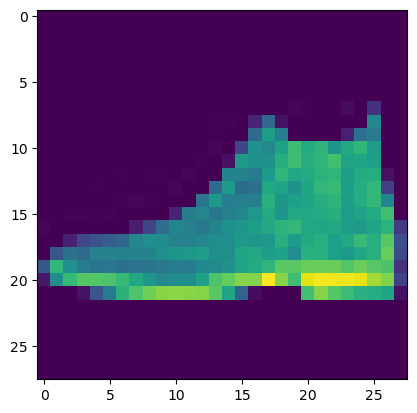

In [24]:
plt.imshow(X_test[0])